In [1]:
#Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, Column, Integer, Float, String, ForeignKey, and_
from sqlalchemy_utils import database_exists, create_database
import seaborn as sns
from datetime import datetime, date, time

In [2]:
def calc_temps(start_dt, end_dt):
    try:
        #build engine
        start_dt = str(start_dt)
        end_dt = str(end_dt)
        engine = create_engine('sqlite:///hawaii.sqlite')
        if not database_exists(engine.url):
            create_database(engine.url)
        Base = automap_base()
        #Create metadata
        Base.metadata.create_all(engine)
        Base.prepare(engine, reflect=True)
        #Create Session
        session = Session(bind=engine)
        conn = engine.connect()
        Measurements = Base.classes.measurements
        Stations = Base.classes.stations
        '''
        maxtemp = session.query(func.max(Measurements.tobs)).filter(and_(Measurements.date>=start_dt,Measurements.date<=end_dt))
        avgtemp = session.query(func.avg(Measurements.tobs)).filter(and_(Measurements.date>=start_dt,Measurements.date<=end_dt))
        mintemp = session.query(func.min(Measurements.tobs)).filter(and_(Measurements.date>=start_dt,Measurements.date<=end_dt))
        '''
        maxtemp = pd.read_sql("SELECT max(tobs) as tmax FROM measurements WHERE date between '" + str(start_dt) + "' and '" + str(end_dt) + "'", conn)
        avgtemp = pd.read_sql("SELECT avg(tobs) as tavg FROM measurements WHERE date between '" + str(start_dt) + "' and '" + str(end_dt) + "'", conn)
        mintemp = pd.read_sql("SELECT min(tobs) as tmin FROM measurements WHERE date between '" + str(start_dt) + "' and '" + str(end_dt) + "'", conn)
        plt.bar(1, height=avgtemp['tavg'],yerr=maxtemp['tmax'] - mintemp['tmin'], align='edge', width=.01)
        plt.ylabel('Temp (F)')
        plt.title('Vacation Avg Temp')
        #plt.xticks( x )
        return plt.show()
    except:
        if start_dt > '2017-08-23' or end_dt>'2017-08-23':
            return 'Error:  Date range exceeds maximum date in data.'

Enter start date of vacation (YYYY-MM-DD):  2017-01-01
Enter end date of vacation (YYYY-MM-DD):  2017-04-29


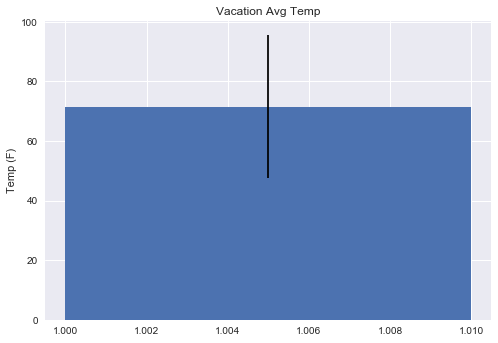

In [3]:
if __name__ == '__main__':
    start_dt = input('Enter start date of vacation (YYYY-MM-DD):  ')
    end_dt = '0001-01-01'
    start_dt = datetime.strptime(start_dt,'%Y-%m-%d')
    end_dt = datetime.strptime(end_dt,'%Y-%m-%d')
    while end_dt < start_dt:
        end_dt = input('Enter end date of vacation (YYYY-MM-DD):  ')
        end_dt = datetime.strptime(end_dt,'%Y-%m-%d') 
    calc_temps(start_dt,end_dt)